The Data set consists of: 
--> Positive pearson correlation between the volume of the tumor and the weight of the mice: 0.66 (when theoretically -1<=x<1)
-->These two variables does not have a linear behavior as r is 0.43 (when theoretically r >= .80 for a linear data set)
-->According to the boxplot Compomulin and Ramicane are the pharmaceuticals that are the most efficient as the volume of the tumor has the smallest proportion. 
-->The most experimental drug is Capomulin, with a total of 232 mice under studies. 


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "../Downloads/Mouse_metadata.csv"
study_results_path = "../Downloads/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [3]:
# Combine the data into a single dataset
combined_pharma_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_pharma_results.head()
# Display the data table for preview



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
number_mice_df = len(combined_pharma_results["Mouse ID"].value_counts())

mice_count = pd.DataFrame ({"Number of mice":[number_mice_df]})
mice_count

,Number of mice
0,249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = combined_pharma_results[combined_pharma_results.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_ID.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 



In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_pharma_results.drop_duplicates("Mouse ID")
clean_df

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_df["Mouse ID"].count()
mouse_count

249

In [9]:
mouse_count_1 = combined_pharma_results["Mouse ID"].count()
mouse_count_1

1893

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_pharma_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_pharma_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_pharma_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dv = combined_pharma_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_pharma_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mean = combined_pharma_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
#median = combined_pharma_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
#variance = combined_pharma_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
#standard_dv = combined_pharma_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
#sem = combined_pharma_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Using the aggregation method, produce the same summary statistics in a single line

#df.groupby('key').aggregate({'data1': 'min',
                             #'data2': 'max'})
#aggregate_df = aggregate_df('Drug Regimen').aggregate({"mean": mean, 
                                                      #"median": median, 
                                                      #"variance": variance, 
                                                      #"standard deviation": standard_dv, 
#df.groupby('key').aggregate(['min', np.median, max])                         

#aggregate_df

#aggregate_df = combined_pharma_results.groupby("Drug Regimen").aggregate([mean, median, variance, standard_dv, sem])
#aggregate_df

#This method did not work

In [12]:
aggregate_df = combined_pharma_results.groupby('Drug Regimen')
aggregation_df = aggregate_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
aggregation_df

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_totals = combined_pharma_results.groupby(["Drug Regimen"]).count()["Mouse ID"]
pd.DataFrame(regimen_totals)


,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


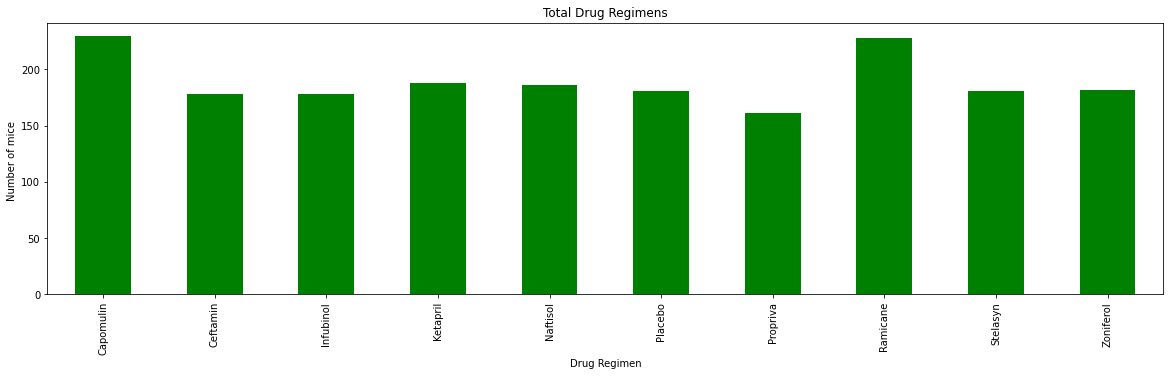

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_totals.plot(kind="bar", color="g", figsize = (20,5))

plt.title("Total Drug Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice ")

#show chart and set layout
plt.show()
plt.tight_layout()
plt.grid



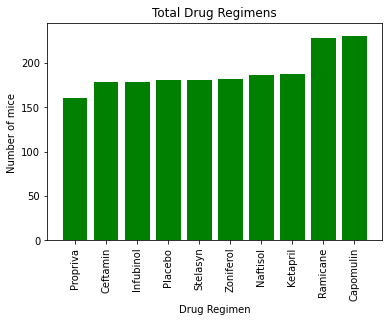

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# I will do it in order of lower to higher total mice

mice_totals = [161, 178, 178, 181, 181, 182, 186, 188, 228, 230 ]
x_axis = np.arange(len(regimen_totals))
plt.bar(x_axis, mice_totals, color='g', alpha=1)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Propriva', 'Ceftamin', 'Infubinol', 'Placebo', 'Stelasyn', 'Zoniferol', 'Naftisol', 'Ketapril', 'Ramicane', 'Capomulin'],  rotation='vertical')

plt.ylim(0, max(mice_totals)+15)

plt.title("Total Drug Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice ")
plt.show()
plt.grid

In [16]:
#Total Count of Female vs Male
genders = combined_pharma_results.groupby(["Mouse ID","Sex"])
genders

gender_df = pd.DataFrame(genders.size())


mouse_gender_df = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender_df.columns = ["Total Count"]

mouse_gender_df


,Total Count
Sex,
Female,124
Male,125


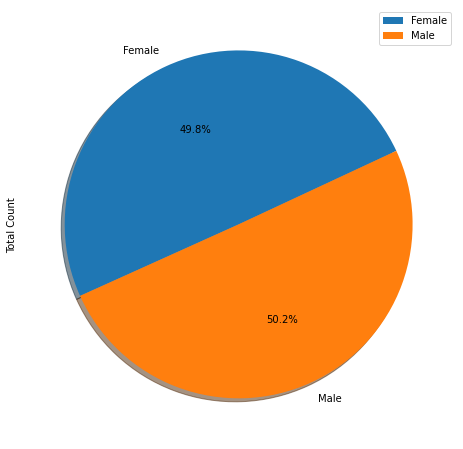

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot_1 = mouse_gender_df.plot.pie( y='Total Count', figsize=(8,8), startangle=25, shadow = True, autopct="%1.1f%%")
plt.show()

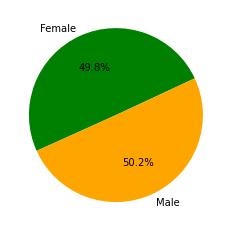

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["green", "orange"]
labels = ["Female", "Male"]
bins = [124, 125]

plt.pie(bins, labels=labels, colors=colors, autopct="%1.1f%%", startangle=25)
plt.show()
plt.tight_layout


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin_df = combined_pharma_results.loc[combined_pharma_results["Drug Regimen"] == "Capomulin",:]

Capomulin_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [20]:
Tumor_Capomulin = Capomulin_df["Tumor Volume (mm3)"]

quartiles = Tumor_Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Volume is: {lowerq}")
print(f"The upper quartile of volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers are the lower value of {lower_bound} and above {upper_bound}.")

The lower quartile of Volume is: 37.685932865
The upper quartile of volume is: 45.0
The interquartile range of volume is: 7.314067135000002
The the median of volume is: 41.557808879999996 
Capomulin potential outliers are the lower value of 26.714832162499995 and above 55.9711007025.


In [21]:
Ramicane_df = combined_pharma_results.loc[combined_pharma_results["Drug Regimen"] == "Ramicane", :]
Ramicane_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
Tumor_Ramicane= Ramicane_df["Tumor Volume (mm3)"]

quartiles_r = Tumor_Ramicane.quantile([0.25,0.5,0.75])
lowerq_r = quartiles[0.25]
upperq_r = quartiles[0.75]
iqr_r = upperq-lowerq

print(f"The lower quartile of Volume is: {lowerq_r}")
print(f"The upper quartile of volume is: {upperq_r}")
print(f"The interquartile range of volume is: {iqr_r}")
print(f"The the median of volume is: {quartiles_r[0.5]} ")

lower_bound_r = lowerq_r - (1.5*iqr_r)
upper_bound_r = upperq_r + (1.5*iqr_r)
print(f"Ramicane outliers are {lower_bound_r} and above {upper_bound_r}.")

The lower quartile of Volume is: 37.685932865
The upper quartile of volume is: 45.0
The interquartile range of volume is: 7.314067135000002
The the median of volume is: 40.67323554 
Ramicane outliers are 26.714832162499995 and above 55.9711007025.


In [23]:
Infobinol_df = combined_pharma_results.loc[combined_pharma_results["Drug Regimen"] == "Infubinol", :]
Infobinol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


In [24]:
Tumor_Infobinol= Infobinol_df["Tumor Volume (mm3)"]

quartiles_I = Tumor_Infobinol.quantile([0.25,0.5,0.75])
lowerq_I = quartiles[0.25]
upperq_I = quartiles[0.75]
iqr_I = upperq-lowerq

print(f"The lower quartile of Volume is: {lowerq_I}")
print(f"The upper quartile of volume is: {upperq_I}")
print(f"The interquartile range of volume is: {iqr_I}")
print(f"The the median of volume is: {quartiles_I[0.5]} ")

lower_bound_I = lowerq_I - (1.5*iqr_I)
upper_bound_I = upperq_I + (1.5*iqr_I)
print(f"Ramicane outliers are {lower_bound_I} and above {upper_bound_I}.")

The lower quartile of Volume is: 37.685932865
The upper quartile of volume is: 45.0
The interquartile range of volume is: 7.314067135000002
The the median of volume is: 51.82058438 
Ramicane outliers are 26.714832162499995 and above 55.9711007025.


In [25]:

Ceftamin_df = combined_pharma_results.loc[combined_pharma_results["Drug Regimen"] == "Ceftamin", :]
Ceftamin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1


In [26]:
Tumor_Ceftamin= Ceftamin_df["Tumor Volume (mm3)"]

quartiles_C = Tumor_Ceftamin.quantile([0.25,0.5,0.75])
lowerq_C = quartiles[0.25]
upperq_C = quartiles[0.75]
iqr_C = upperq-lowerq

print(f"The lower quartile of Volume is: {lowerq_C}")
print(f"The upper quartile of volume is: {upperq_C}")
print(f"The interquartile range of volume is: {iqr_C}")
print(f"The the median of volume is: {quartiles_C[0.5]} ")

lower_bound_C = lowerq_I - (1.5*iqr_C)
upper_bound_C = upperq_I + (1.5*iqr_C)
print(f"Ramicane outliers are {lower_bound_C} and above {upper_bound_C}.")

The lower quartile of Volume is: 37.685932865
The upper quartile of volume is: 45.0
The interquartile range of volume is: 7.314067135000002
The the median of volume is: 51.77615728000001 
Ramicane outliers are 26.714832162499995 and above 55.9711007025.


In [27]:
#The same results appear on every Regimen, i have no mistakes of adentation, Nor typping errors. I created each new variable. 

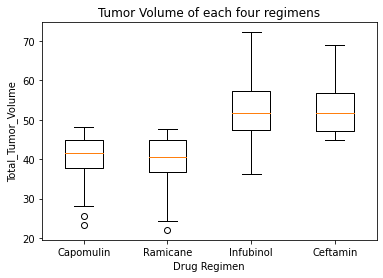

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Total_TumorVolume = [Tumor_Capomulin, Tumor_Ramicane, Tumor_Infobinol, Tumor_Ceftamin]
fig1, ax1 = plt.subplots()

ax1.set_title('Tumor Volume of each four regimens')
ax1.set_ylabel('Total_Tumor_Volume')
ax1.set_xlabel('Drug Regimen')


ax1.boxplot(Total_TumorVolume, labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()


In [29]:
#Script Taken From:
#quartiles = temperatures.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")



## Line and Scatter Plots

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse_df = combined_pharma_results.loc[combined_pharma_results["Mouse ID"] == "x401",:] #I choose this mouse
capomulin_mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0


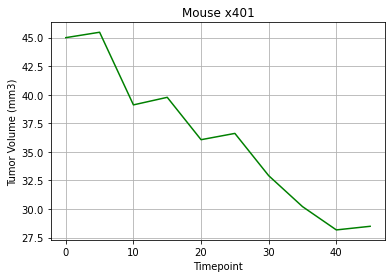

In [31]:
x_axis = capomulin_mouse_df["Timepoint"]
tumor_volume_df = capomulin_mouse_df["Tumor Volume (mm3)"]

plt.title('Mouse x401')
plt.plot(x_axis, tumor_volume_df , color = "green")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

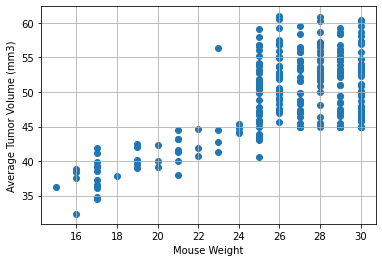

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_avg = combined_pharma_results.groupby(['Mouse ID']).mean()
plt.scatter(Capomulin_avg['Weight (g)'], Capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show(

## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = (st.pearsonr(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])[0])
print(f"The correlation between these two variables is {correlation}")


The correlation between these two variables is 0.6592482941546904


The r-squared is: 0.4346083133458688


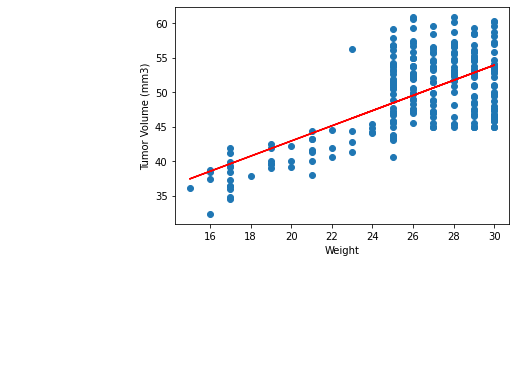

In [34]:
x_values = Capomulin_avg['Weight (g)']
y_values = Capomulin_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14 ,color="green")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [36]:
Linear_Regression= st.linregress(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])
Linear_Regression

LinregressResult(slope=1.0966925374238428, intercept=21.02408854870573, rvalue=0.6592482941546901, pvalue=1.990745803186476e-32, stderr=0.0795906600179457)